# Lending Club Case Study

In [728]:
# import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading provided CSV file using pandas library

In [729]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

##### Lets have look on CSV data, columns and shape

In [730]:
loan_df.shape

(39717, 111)

In [731]:
loan_df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

##### preview the dataset

In [732]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [733]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Data Quality issues identified:
#### Missing Values :
- There is no row with all null values
- There are columns with null values
- There are columns which very few non null values and signifiant null values
- There are columns which single value across all rows

#### Standard Values issues :
- prefix space should be handled on term column
- % symbol should be removed from int_rate and revol_util
- emp_length should be modified into numeric value
- date format should be changed on issue_d, earliest_cr_line, last_pymnt_d etc.
- round the decimal places into 2 digit for total_pymnt column
- zipcode suffix values should be fixed

# Data Cleaning and Manipulation

##### Lets check if there are rows with all values null. 

In [734]:
completely_null_rows = loan_df[loan_df.isnull().all(axis=1)]
completely_null_rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


##### list out the columns only filled with null values and  drop them from data set as it wont impact data analysis

In [735]:
columns_with_null = loan_df.columns[loan_df.isnull().all()]
print(columns_with_null)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [736]:
loan_df.dropna(axis=1, how='all', inplace=True)

##### verify the columns has dropped

In [737]:
loan_df.shape

(39717, 57)

In [738]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

##### Find out the columns holding significant null values

In [739]:
columns_with_null = loan_df.columns[loan_df.isnull().any()]
print(columns_with_null)

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [740]:
columns_with_null = loan_df.isnull().sum()
columns_with_null[columns_with_null > 0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

##### Lets drop columns where null values are quite high in number

In [741]:
loan_df.dropna(axis = 1, thresh = 30000, inplace=True)

In [742]:
columns_with_null = loan_df.isnull().sum()
columns_with_null[columns_with_null > 0]

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

##### Lets check rows which has significant null values

In [743]:
null_counts_rowwise = loan_df.isnull().sum(axis=1)
null_counts_rowwise[null_counts_rowwise > 4]

39659    5
39660    5
39700    5
39704    5
39706    5
39714    5
39715    5
dtype: int64

###### There is no row exist in data set with significant null values.

##### Invalid values check

In [744]:
# List of values to check
values_to_check = ["NA", "XX", "999", "N/A", "n/a", "NaN", "NULL", "null", "", "None", "Missing", "Unknown"]

# Check if values are present in any column
values_present_in_columns = loan_df.isin(values_to_check).any()

# Display columns where values are present
columns_with_values = values_present_in_columns[values_present_in_columns].index.tolist()
print("Columns with values:", columns_with_values)

Columns with values: ['title']


In [745]:
loan_df[loan_df.title == 'Unknown'].shape

(1, 53)

##### Find out the columns which can be dropped off other than null (Usually filled with single value)

In [746]:
for i in loan_df.columns:
    if (len(loan_df[i].value_counts())<3):
        print(loan_df[i].value_counts())
        print("====================") 

 36 months    29096
 60 months    10621
Name: term, dtype: int64
n    39717
Name: pymnt_plan, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
1    39717
Name: policy_code, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
0.0    39678
Name: tax_liens, dtype: int64


In [747]:
# drop the selected columns
invalid_col = ["url","pymnt_plan","initial_list_status","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"]
loan_df.drop(columns=invalid_col,inplace=True,axis=1)

##### columns considered which are not useful for analysis

In [748]:
loan_df.drop(columns=['out_prncp','total_pymnt_inv','collection_recovery_fee','funded_amnt_inv'], inplace=True)

In [749]:
#filling the null values in empployee title with "unknown"
loan_df['emp_title'].fillna('Unknown', inplace=True)

In [750]:
loan_df.shape

(39717, 39)

# Understanding of important columns to proceed ahead
- id : unique loan id for each row and sort of primary key
- member_id : unique_id for borrower

- loan_amt : final loan (prinipal) amount of that loan
- funded_amnt : total ammount including prinicipal + interest + charges
- term : tenure of emi payment of loan - 2 possible values - 36 months or 60 months
- int_rate : interest rate on which loan is given
- installment : monthly emi of the borrower
- grade : risk grade for loan - A is least risky, G is highest risky
- sub_grade : risk subgrade for loan - A1 is least and G5 is highest
- emp_title : job title of the borrower
- emp_length : duration of employee working in that emp_title, max is 10+ in possible values.
- home_ownership : home ownership status of borrower, possible values are RENT,MORTGAGE, OWN, OTHER
- annual_inc : annual income of the borrower
- verification_status : annual income is verified or not, possible values are verified, not verified, source verified
- issue_d : month in which loan was issued
- loan_status : current status of loan, possible values - Fully paid, Current, Charged Off
- purpose : purpose of the borrower for taking loan, already categorize in 12 category
- title : description provided by the borrower for applying loan
- zip_code : 3 digits of pincode which will represent area, region, sub-region. these values have xx in end which can be removed.
- addr_state : state of address provided by borrower
- dti : debt to income ratio of borrower
- delinq_2yrs : occurence of 30+ delayed payment by borrower in last 2 years
- earliest_cr_line : month in which last loan was taken by borrower 
- inq_last_6mths : inquery of credit in last 6 months by any authorized lender for that borrower
- open_acc : number of active loans taken by borrower
- pub_rec : number of nagative records in past for borrower
- revol_bal : total outstanding credit balance of the borrower
- revol_util : credit utilization ratio - total outstanding credit/ total credit limit
- total_acc : total loan accounts of the borrower including closed in history
- total_pymnt : total payment done by borrower till date for entire fund
- total_rec_prncp : total prinipal amount received as part of payment till date
- total_rec_int : total interst amount recevied
- total_rec_late_fee : total late fee recevied
- recoveries : total recovery from borrower
- last_pymnt_d : last month when payment was recevied
- last_pymnt_amnt : last total payment amount recevied
- last_credit_pull_d : last month on which credit score is checked by lendor
- pub_rec_bankruptcies : number of public records available for bankcrupt case for the borrower

##### Fixing Data Quality issues

- prefix space should be handled on term column
- % symbol should be removed from int_rate and revol_util
- emp_length should be modified into numeric value
- date format should be changed on issue_d, earliest_cr_line, last_pymnt_d etc.
- round the decimal places into 2 digit for total_pymnt column
- zipcode suffix values should be fixed

In [751]:
# Lets remove percentage icon from this column
loan_df.int_rate = loan_df.int_rate.str.rstrip('%')
loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate'], errors='coerce')

loan_df.revol_util = loan_df.revol_util.str.rstrip('%')
loan_df['revol_util'] = pd.to_numeric(loan_df['revol_util'], errors='coerce')

In [752]:
# Fix the date format
loan_df.issue_d = pd.to_datetime(loan_df.issue_d , format='%b-%y')
loan_df.earliest_cr_line = pd.to_datetime(loan_df.earliest_cr_line , format='%b-%y')

In [753]:
# Fix zipcode and total_payment
loan_df.zip_code = loan_df.zip_code.str.rstrip('xx')
loan_df.zip_code = pd.to_numeric(loan_df.zip_code)


loan_df.total_pymnt = loan_df.total_pymnt.round(2)

##### convert term months into years make the units meaningful

In [754]:
loan_df["term"] = loan_df["term"].apply(lambda x: int(x.strip("months"))/12)
loan_df["term"] = loan_df["term"].astype("int32")

In [755]:
# Fix emp_length
loan_df.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [756]:
# Define a mapping dictionary
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Apply the mapping to create a new numeric column
loan_df['emp_length'] = loan_df['emp_length'].map(emp_length_mapping)
loan_df['emp_length'] = pd.to_numeric(loan_df['emp_length'], errors='coerce')
# Display the result
print(loan_df['emp_length'])

loan_df['emp_length'].fillna(-1, inplace=True)


0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 39717, dtype: float64


##### rename the column name meaningfully

In [757]:
loan_df.rename(columns={"emp_length":"emp_exp","term":"term_years"},inplace=True)

# Data analysis

### Univariate Analysis

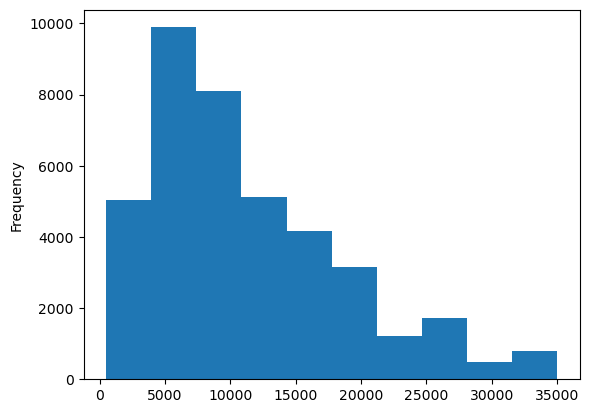

In [758]:
# Around 5000 loan amount there were more loan disbursed.
loan_df["loan_amnt"].plot.hist()
plt.show()

In [759]:
loan_df["loan_amnt"].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [760]:
loan_df["term_years"].value_counts()

3    29096
5    10621
Name: term_years, dtype: int64

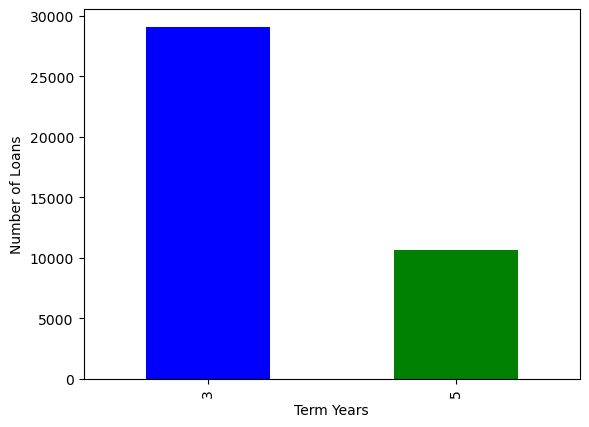

In [814]:
# 3 years loans has higher volume than 5 year
loan_df["term_years"].value_counts().plot(kind = 'bar', color = ['blue','green'])
plt.xlabel('Term Years')
plt.ylabel('Number of Loans')
plt.show()

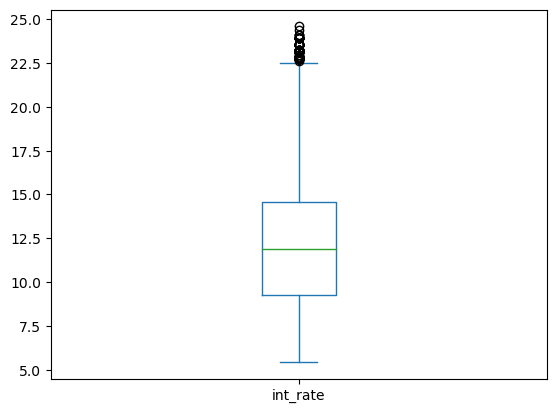

In [762]:
loan_df["int_rate"].plot.box()
plt.show()

In [763]:
# mean and meadian was pretty close to 12 and makes sense
loan_df["int_rate"].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

<Axes: >

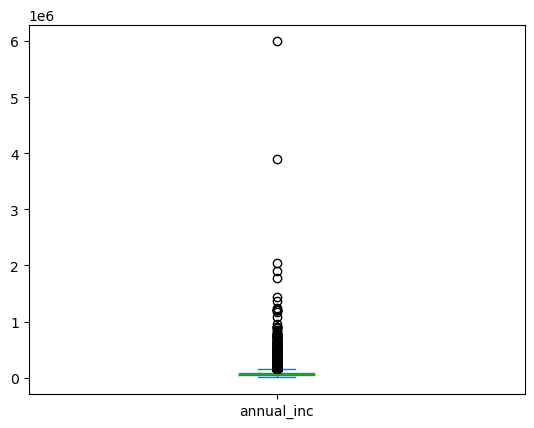

In [764]:
loan_df.annual_inc.plot(kind = 'box')

In [765]:
# we can see some outliers in annual income, lets remove them

loan_df =  loan_df[loan_df.annual_inc < 2000000]

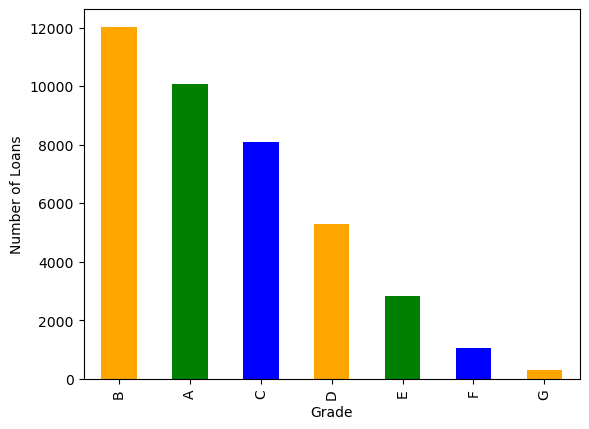

In [820]:
# suprisingly grade B has more volume than A ( might the B grade loan applicant is more than A grade )
loan_df["grade"].value_counts().plot(kind = 'bar', color = ['orange','green','blue'])
plt.xlabel('Grade')
plt.ylabel('Number of Loans')
plt.show()

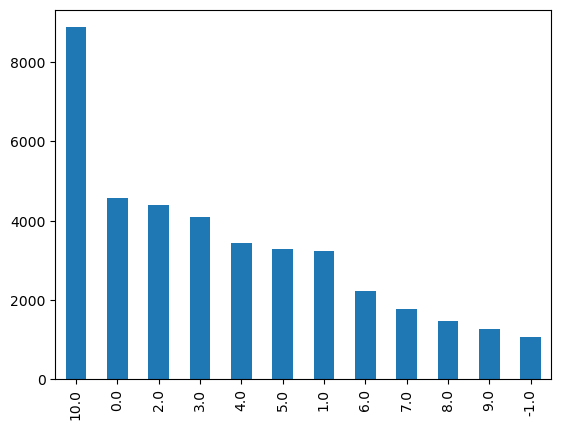

In [767]:
# 10years exp got more volume
loan_df["emp_exp"].value_counts().plot.bar()
plt.show()

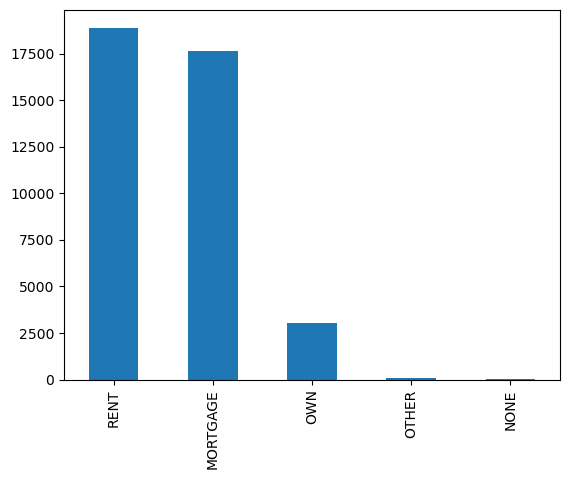

In [768]:
loan_df["home_ownership"].value_counts().plot.bar()
plt.show()

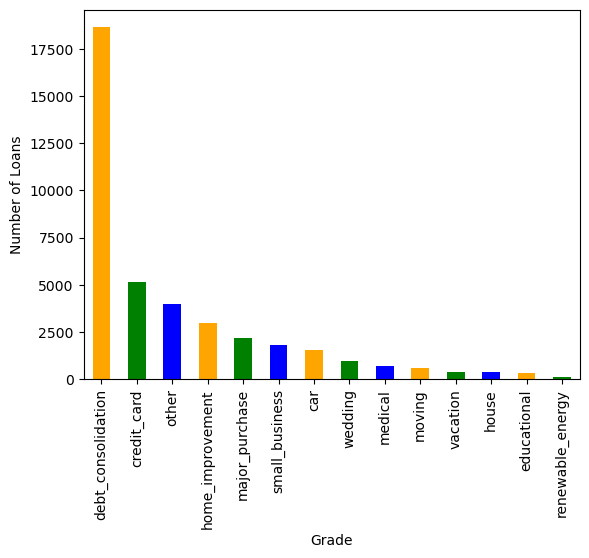

In [823]:
# debt consolidation has higher volume
loan_df.purpose.value_counts().plot(kind = 'bar', color = ['orange','green','blue'])
plt.xlabel('Grade')
plt.ylabel('Number of Loans')
plt.show()

In [770]:
loan_df["dti"].describe()

count    39714.000000
mean        13.316127
std          6.677860
min          0.000000
25%          8.180000
50%         13.405000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [771]:
loan_df["revol_util"].describe()

count    39664.000000
mean        48.833332
std         28.332982
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

# Segmented Univariate Analysis

In [772]:
loan_df.groupby(by=["loan_status"])["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40
Current,1140.0,15.031465,3.600343,6.00,11.99,14.65,17.99,24.59
Fully Paid,32947.0,11.609737,3.600117,5.42,8.49,11.49,13.99,24.11


In [773]:
# OTHER and NONE group minimum interest rate is higher than other category
loan_df.groupby(by=["home_ownership"])["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership,,,,,,,,
MORTGAGE,17657.0,11.771748,3.878356,5.42,8.4900,11.49,14.27,24.59
NONE,3.0,8.696667,0.945004,7.75,8.2250,8.70,9.17,9.64
OTHER,98.0,12.040918,2.652970,7.40,9.6475,11.86,14.38,17.90
OWN,3058.0,11.772642,3.729123,5.42,8.5900,11.58,14.22,23.59
RENT,18898.0,12.294890,3.560217,5.42,9.9100,12.21,14.72,24.40


In [774]:
loan_df.groupby(by=["purpose"])["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
car,1549.0,10.530097,3.394908,5.42,7.510,10.37,13.060,22.85
credit_card,5130.0,11.701173,3.558829,5.42,8.900,11.49,13.980,24.11
debt_consolidation,18640.0,12.487901,3.733181,5.42,9.990,12.42,15.050,24.11
educational,325.0,11.650831,2.544344,6.00,9.630,11.83,13.220,21.27
home_improvement,2974.0,11.400081,3.785346,5.42,7.880,11.12,13.920,23.91
house,381.0,12.228136,3.979786,5.42,9.320,11.83,15.050,23.13
major_purchase,2187.0,10.843064,3.609838,5.42,7.510,10.74,13.490,23.59
medical,693.0,11.492121,3.680902,5.42,7.910,11.34,14.220,22.06
moving,583.0,11.563619,3.529138,5.42,8.540,11.14,13.990,22.11


In [775]:
loan_df.groupby(by=["home_ownership"])["funded_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership,,,,,,,,
MORTGAGE,17657.0,12322.059240,7727.390707,500.0,6000.0,10200.0,16000.0,35000.0
NONE,3.0,5600.000000,3857.460304,2800.0,3400.0,4000.0,7000.0,10000.0
OTHER,98.0,10148.724490,5784.026810,1000.0,5125.0,9000.0,15000.0,25000.0
OWN,3058.0,10049.403205,6838.569584,900.0,5000.0,8000.0,14000.0,35000.0
RENT,18898.0,9814.177426,6468.793063,500.0,5000.0,8000.0,13000.0,35000.0


# Bivariate Analysis

In [776]:
# create a function to display average values for value_counts
def disp_avg(ind,total,print_str):
    total.sort_index(inplace=True)
    for val in total.index:
        if val not in ind.index:
            continue
        val_per = round((ind[val]/total[val])*100,2)
        print("{} {} defaulters {} %".format(val,print_str,val_per))

In [777]:
# Derived matrix
loan_df["int_rate_round"]=loan_df["int_rate"].astype("int32")

In [778]:
# defaulters data set
loan_def_df = loan_df[loan_df["loan_status"]=="Charged Off"]

##### <font color="blue"> 5 year term has more defaulters even though we have more volume in 3 year loan

In [779]:
term_def_ind = loan_def_df["term_years"].value_counts()
term_tot = loan_df["term_years"].value_counts()
disp_avg(term_def_ind,term_tot,"year")

3 year defaulters 11.09 %
5 year defaulters 22.6 %


##### <font color="blue"> Loans bought for small business has defaulted more even though debt consolidation has higher voume.</font>
##### <font color="blue"> Renewable engery and Educational purpose fall in second and thrid respectively</font>

In [780]:
purpose_tot = loan_df["purpose"].value_counts()
purpose_def_ind = loan_def_df["purpose"].value_counts()
disp_avg(purpose_def_ind,purpose_tot,"")

car  defaulters 10.33 %
credit_card  defaulters 10.57 %
debt_consolidation  defaulters 14.84 %
educational  defaulters 17.23 %
home_improvement  defaulters 11.67 %
house  defaulters 15.49 %
major_purchase  defaulters 10.15 %
medical  defaulters 15.3 %
moving  defaulters 15.78 %
other  defaulters 15.85 %
renewable_energy  defaulters 18.45 %
small_business  defaulters 25.98 %
vacation  defaulters 13.91 %
wedding  defaulters 10.14 %


##### <font color="blue"> Other Category of home_ownership likely to default more

In [781]:
# which home_ownership has more defaulters - 
homeown_tot = loan_df["home_ownership"].value_counts()
homeown_def_ind = loan_def_df["home_ownership"].value_counts()
disp_avg(homeown_def_ind,homeown_tot,"category")

MORTGAGE category defaulters 13.18 %
OTHER category defaulters 18.37 %
OWN category defaulters 14.49 %
RENT category defaulters 15.02 %


##### <font color="blue"> Rate of interest plays vital role on defaulters when rate of interest increase no of defaulters got increased.

In [782]:
int_rate_total = loan_df["int_rate_round"].value_counts()
int_rate_def_ind = loan_def_df["int_rate_round"].value_counts()
disp_avg(int_rate_def_ind,int_rate_total,"percent rate of interest")

5 percent rate of interest defaulters 4.14 %
6 percent rate of interest defaulters 4.78 %
7 percent rate of interest defaulters 6.06 %
8 percent rate of interest defaulters 8.57 %
9 percent rate of interest defaulters 9.34 %
10 percent rate of interest defaulters 11.13 %
11 percent rate of interest defaulters 13.69 %
12 percent rate of interest defaulters 15.21 %
13 percent rate of interest defaulters 15.91 %
14 percent rate of interest defaulters 17.35 %
15 percent rate of interest defaulters 19.91 %
16 percent rate of interest defaulters 23.54 %
17 percent rate of interest defaulters 25.69 %
18 percent rate of interest defaulters 25.08 %
19 percent rate of interest defaulters 29.05 %
20 percent rate of interest defaulters 30.5 %
21 percent rate of interest defaulters 38.42 %
22 percent rate of interest defaulters 40.0 %
23 percent rate of interest defaulters 30.95 %
24 percent rate of interest defaulters 40.0 %


# Derived Matrix

In [783]:
#convert issue_d into new drived columns issue_month and issue_year columns
loan_df.issue_d = pd.to_datetime(loan_df.issue_d , format='%b-%y')
loan_df['issue_month'] = loan_df.issue_d.dt.month
loan_df['issue_year'] = loan_df.issue_d.dt.year
loan_df.drop(columns='issue_d', inplace=True)

In [784]:
#convert delinq_2yrs into new drived column delayed_payment_in_past
loan_df['delayed_payment_in_past'] = loan_df.delinq_2yrs > 0
loan_df.delayed_payment_in_past.value_counts()
loan_df.drop(columns='delinq_2yrs', inplace=True)

In [785]:
#convert earliest_cr_line into new drived columns last_loan_taken_month and last_loan_taken_year
loan_df['last_loan_taken_month'] = loan_df.earliest_cr_line.dt.month
loan_df['last_loan_taken_year'] = loan_df.earliest_cr_line.dt.year
loan_df.drop(columns='earliest_cr_line', inplace=True)

In [786]:
#lets check data set once 
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,term_years,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_round,issue_month,issue_year,delayed_payment_in_past,last_loan_taken_month,last_loan_taken_year
0,1077501,1296599,5000,5000,3,10.65,162.87,B,B2,Unknown,...,Jan-15,171.62,May-16,0.0,10,12,2011,False,1,1985
1,1077430,1314167,2500,2500,5,15.27,59.83,C,C4,Ryder,...,Apr-13,119.66,Sep-13,0.0,15,12,2011,False,4,1999
2,1077175,1313524,2400,2400,3,15.96,84.33,C,C5,Unknown,...,Jun-14,649.91,May-16,0.0,15,12,2011,False,11,2001
3,1076863,1277178,10000,10000,3,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,Jan-15,357.48,Apr-16,0.0,13,12,2011,False,2,1996
4,1075358,1311748,3000,3000,5,12.69,67.79,B,B5,University Medical Group,...,May-16,67.79,May-16,0.0,12,12,2011,False,1,1996


In [787]:
# Derived Matrix - Creating late_fee_received column
loan_df['late_fee_received'] = loan_df['total_rec_late_fee'].apply(lambda x: 'YES' if x > 0 else 'NO')
loan_df.drop(columns='total_rec_late_fee', inplace=True)

In [788]:
# Derived Matrix - creating recoveries_happen column
loan_df['recoveries_happen'] = loan_df['recoveries'].apply(lambda x: 'YES' if x > 0 else 'NO')
loan_df.drop(columns='recoveries', inplace=True)

In [789]:
# Derived Matrix - creating bankrupt_in_past column
loan_df['bankrupt_in_past'] = loan_df['pub_rec_bankruptcies'].apply(lambda x: 'YES' if x > 0 else 'NO')
loan_df.drop(columns='pub_rec_bankruptcies', inplace=True)

In [790]:
#lets filter all unrelevant columns that are not useful for our analysis

loan_df = loan_df[['id','member_id','loan_amnt','funded_amnt','int_rate', 'term_years','grade','sub_grade','purpose','emp_exp','home_ownership','annual_inc'
       ,'verification_status','dti','inq_last_6mths','pub_rec','revol_bal','revol_util','total_acc','issue_month','issue_year'
       ,'loan_status','delayed_payment_in_past','bankrupt_in_past']]

In [791]:
loan_df.shape

(39714, 24)

##### we need one more drived column for loan status numeric so that we can compute mean of charged off vs total loans while ploting graphs


In [792]:
loan_df['loan_status_numeric'] = (loan_df['loan_status'] == 'Charged Off').astype(int)

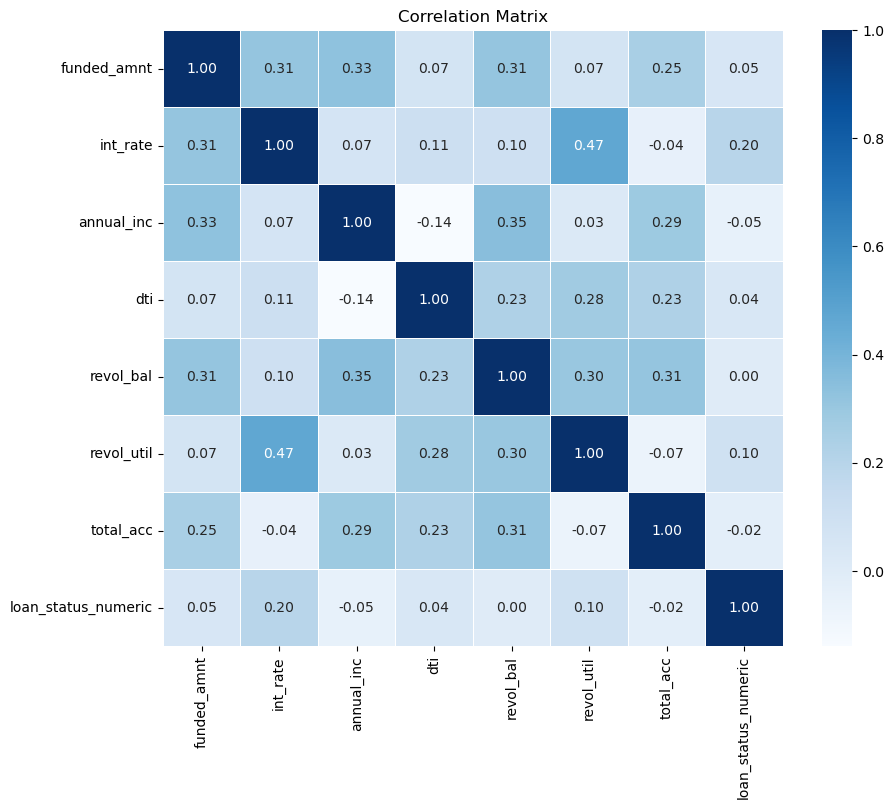

In [793]:
#lets check the co relation metrics between quantitave variables and loan status numeric.

corr = loan_df[['funded_amnt','int_rate','annual_inc','dti','revol_bal','revol_util','total_acc','loan_status_numeric']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, color = 'blue')
plt.title('Correlation Matrix')
plt.show()

In [794]:
#making range buckets will be better here for funded amount, int rate and annual income
percentiles = [0, .25, .50, .75, 1.00]

In [795]:
# Create categories based on funded amounts percentiles
loan_df['funded_amnt_category'] = pd.qcut(loan_df['funded_amnt'], q=percentiles, labels=False)

# Rename the categories for better interpretation
category_labels = ['0-25%', '25-50%', '50-75%', '75-100%']
loan_df['funded_amnt_category'] = pd.cut(loan_df['funded_amnt_category'], bins=len(percentiles)-1, labels=category_labels)


In [796]:
# Create categories based on annual income percentiles
loan_df['annual_income_category'] = pd.qcut(loan_df['annual_inc'], q=percentiles, labels=False)

# Rename the categories for better interpretation
category_labels = ['0-25%', '25-50%', '50-75%', '75-100%']
loan_df['annual_income_category'] = pd.cut(loan_df['annual_income_category'], bins=len(percentiles)-1, labels=category_labels)

In [797]:
# Create categories based on interest rate percentiles
loan_df['int_rate_category'] = pd.qcut(loan_df['int_rate'], q=percentiles, labels=False)

# Rename the categories for better interpretation
category_labels = ['0-25%', '25-50%', '50-75%', '75-100%']
loan_df['int_rate_category'] = pd.cut(loan_df['int_rate_category'], bins=len(percentiles)-1, labels=category_labels)

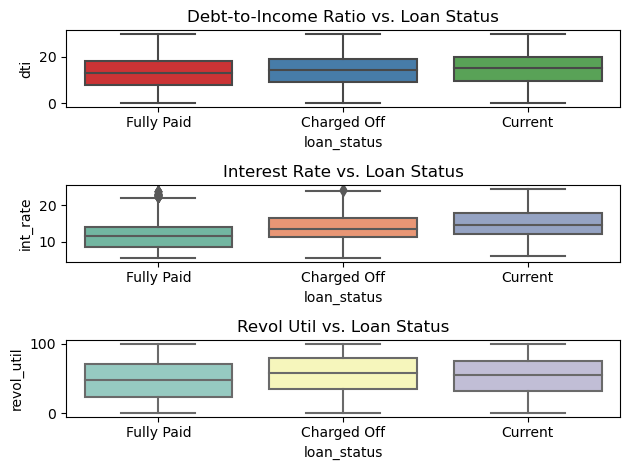

In [824]:
plt.subplot(3, 1, 1)
sns.boxplot(x='loan_status', y='dti', data=loan_df, palette='Set1')
plt.title('Debt-to-Income Ratio vs. Loan Status')

plt.subplot(3, 1, 2)
sns.boxplot(x='loan_status', y='int_rate', data=loan_df, palette='Set2')
plt.title('Interest Rate vs. Loan Status')

plt.subplot(3, 1, 3)
sns.boxplot(x='loan_status', y='revol_util', data=loan_df, palette='Set3')
plt.title('Revol Util vs. Loan Status')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Charged off loan ratio to total loan')

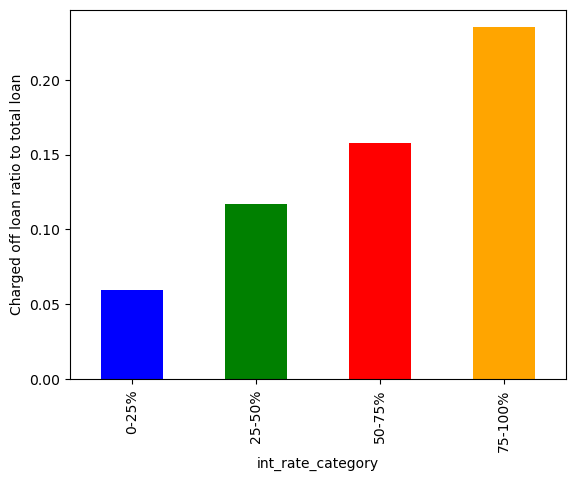

In [831]:
group_by_int_rate = loan_df.groupby(by = 'int_rate_category')
group_by_int_rate['loan_status_numeric'].mean().plot(kind = 'bar', color = ['blue','green','red','orange'])
plt.ylabel("Charged off loan ratio to total loan")

##### Higher interest rate have higher number of defaulters.

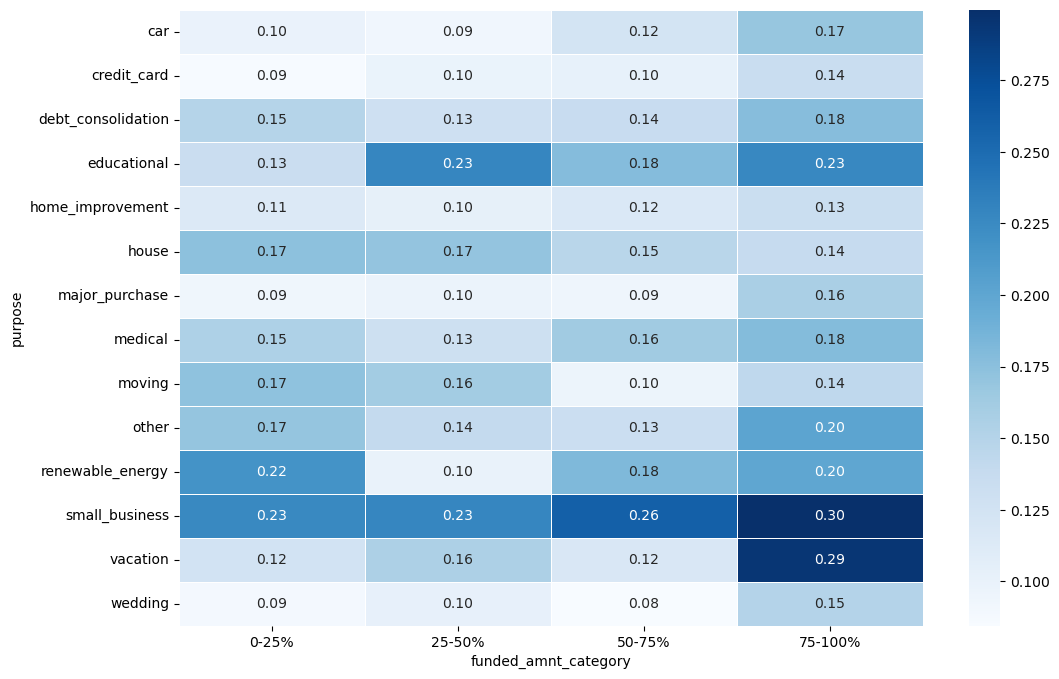

In [799]:

pivot_table = loan_df.pivot_table(index='purpose', columns=['funded_amnt_category'], values='loan_status_numeric', aggfunc='mean')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

###### for higher funded amount, small business and education likely to defaulter as seen in above graph


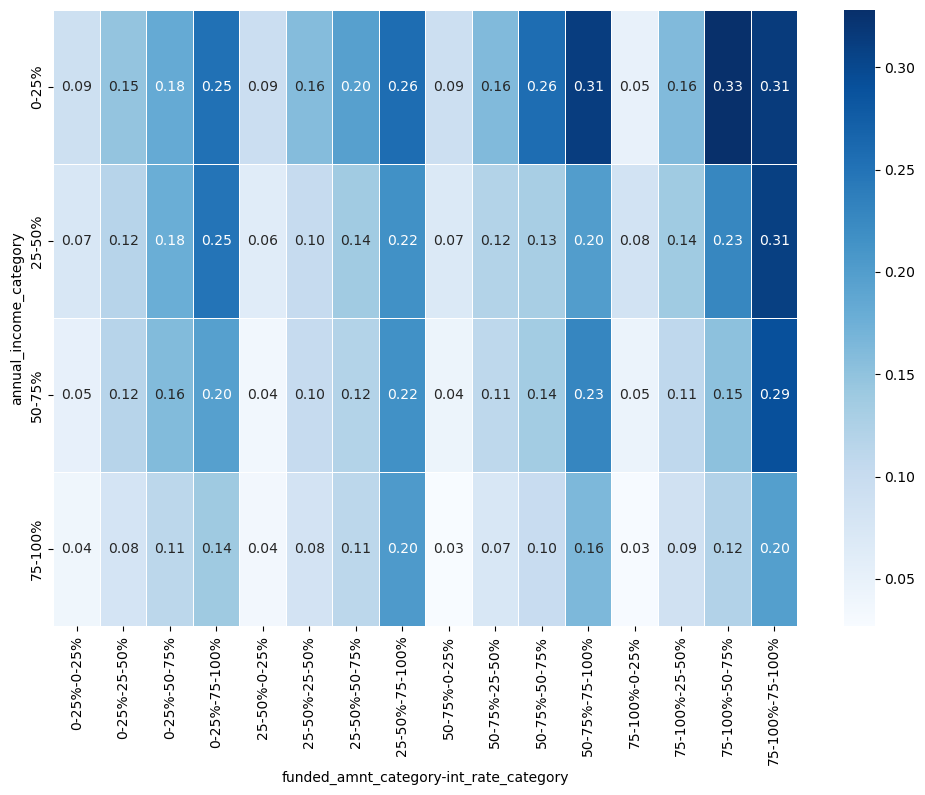

In [800]:
pivot_table = loan_df.pivot_table(index='annual_income_category', columns=['funded_amnt_category','int_rate_category'], values='loan_status_numeric', aggfunc='mean')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

##### in above graph, we can see if annual income is less and interest rate and funded amount is high, then probablity of charged off is higher


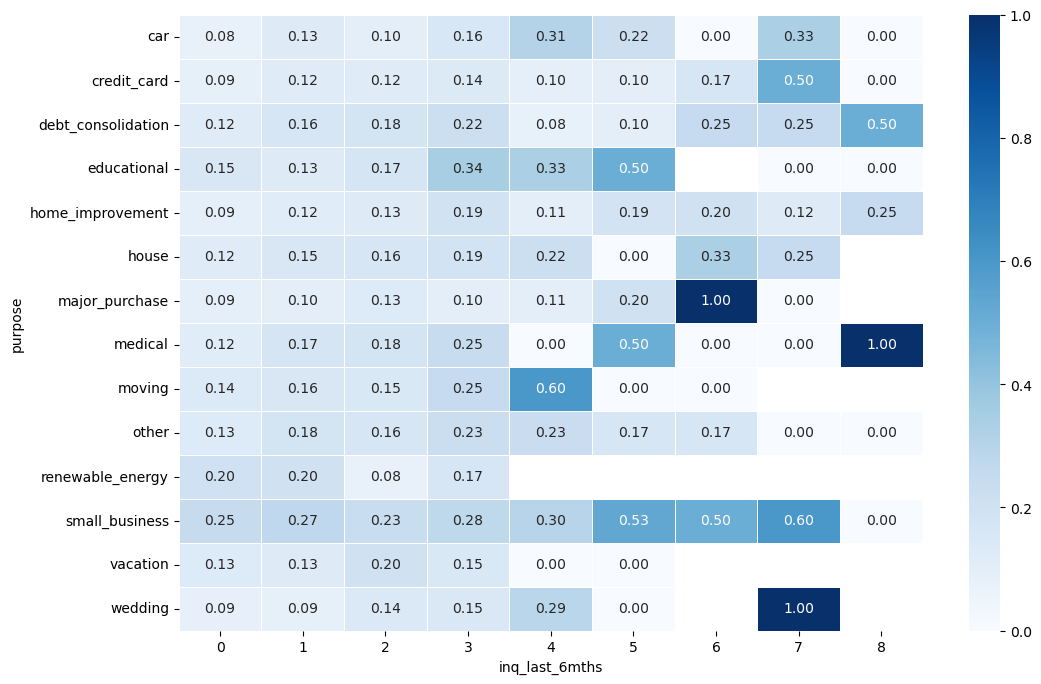

In [801]:
pivot_table = loan_df.pivot_table(index='purpose', columns=['inq_last_6mths'], values='loan_status_numeric', aggfunc='mean')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

###### if number of enquires are higher is number, then chances of charged off inceases, it can seen as 1.0 as well in some usecases in above graph

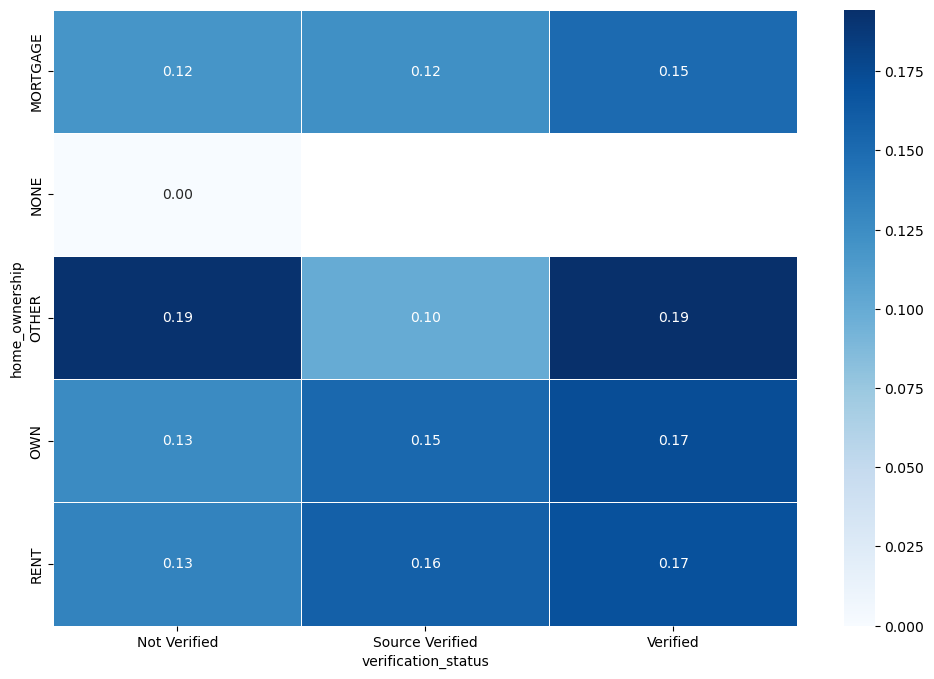

In [802]:
pivot_table = loan_df.pivot_table(index='home_ownership', columns=['verification_status'], values='loan_status_numeric', aggfunc='mean')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

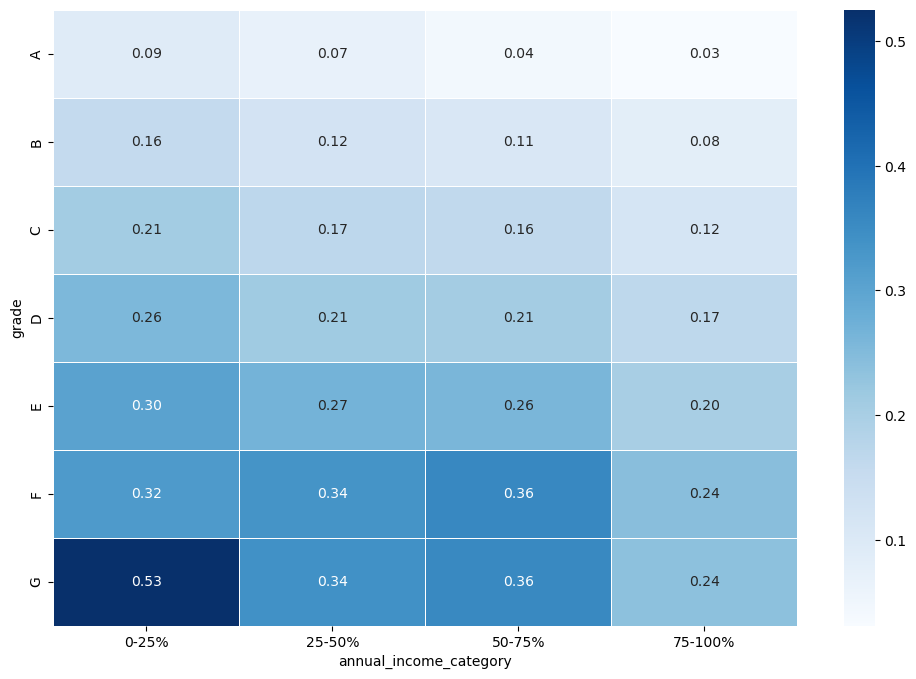

In [803]:
pivot_table = loan_df.pivot_table(index='grade', columns=['annual_income_category'], values='loan_status_numeric', aggfunc='mean')

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.show()

###### if the grade is higher (i.e. F,G) and annual income is less, then probablity of charged off is higher

# Summary

#### 1. Annual Income and Grade - if the grade is higher (i.e. F,G) and annual income is less, then probablity of charged off is higher
#### 2. Number of Enquires in last 6 months - if number of enquires are higher is number, then chances of charged off inceases, it can seen as 1.0 as well in some usecases in above graph
#### 3. Interest Rate, Funded Amount, Loan Amount - in above graph, we can see if annual income is less and interest rate and funded amount is high, then probablity of charged off is higher
#### 4. Purpose - for higher funded amount, small business and education likely to defaulter as seen in above graph
#### 5. home_ownership - Other Category of home_ownership likely to default more

